In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('df_daily_avg.csv')

In [47]:
df

,Date,Dry Bulb Temperature,Dew Point Temperature,Apparent Temperature,Relative Humidity,Wind Direction,Average Wind Speed,Wind Gust,Mean Sea Level Pressure,Rainfall,...,Relative Humidity_lag,Wind Direction_lag,Average Wind Speed_lag,Wind Gust_lag,Mean Sea Level Pressure_lag,Rainfall_lag,Rainfall_LastYear,Month,Day,Year
365,2012-01-01,1.954751,-2.293498,2.221800,-0.281899,0.570709,-0.920174,-0.909894,-0.534178,-0.428772,...,-1.517940,-0.164420,0.362813,0.338076,-0.260558,-0.429158,-0.428858,1,1,2012
366,2012-01-02,3.067918,-2.293498,1.723577,-1.278613,-0.845411,0.402632,0.369294,-0.878040,-0.428772,...,-0.281126,0.570046,-0.920821,-0.910347,-0.532847,-0.429158,-0.428858,1,2,2012
367,2012-01-03,2.233919,-2.293498,1.307152,-1.805247,-0.045229,-1.106167,-1.099535,-0.801084,-0.428772,...,-1.277564,-0.846646,0.402565,0.369340,-0.876663,-0.429158,-0.428858,1,3,2012
368,2012-01-04,1.072106,-2.293498,0.646479,-1.019438,0.376606,0.991610,0.974914,-0.123387,-0.064378,...,-1.804051,-0.046141,-1.106895,-1.100062,-0.799717,-0.429158,-0.428858,1,4,2012
369,2012-01-05,0.318307,-2.293498,-0.602796,-1.431884,0.581465,-0.211709,-0.190395,0.153002,-0.428772,...,-1.018461,0.375864,0.991802,0.975196,-0.122110,-0.064808,-0.428858,1,5,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,2021-03-12,1.333305,1.692616,1.563986,0.095786,-0.659152,-1.030079,-0.635968,-0.376474,-0.428772,...,1.449585,0.111861,-0.903905,-0.614998,0.026904,-0.429158,-0.428858,3,12,2021
3724,2021-03-13,0.925729,1.039792,1.095508,-0.133850,-0.377024,0.766446,1.269911,-0.890233,2.769800,...,0.096454,-0.660312,-1.030774,-0.636315,-0.375163,-0.429158,-0.312720,3,13,2021
3725,2021-03-14,-0.334692,-0.241716,-0.682877,-0.506673,0.697399,-0.086023,0.244761,0.464347,3.053217,...,-0.133119,-0.378069,0.766539,1.270308,-0.888855,2.769022,-0.312720,3,14,2021
3726,2021-03-15,-0.115565,0.162876,0.232914,0.370450,-0.422564,-0.587641,-0.323452,0.854273,-0.428772,...,-0.505838,0.696787,-0.086304,0.244758,0.465547,3.052405,-0.428858,3,15,2021


In [3]:
df_day_shift = df.copy().shift(1)

In [4]:
df_year_rain_shift = df['Rainfall'].copy().shift(365)
df_year_rain_shift = df_year_rain_shift.rename('Rainfall_LastYear')

In [5]:
df_year_rain_shift

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3723    0.0
3724    0.6
3725    0.6
3726    0.0
3727    0.0
Name: Rainfall_LastYear, Length: 3728, dtype: float64

In [6]:
for col in df_day_shift.columns:
    df_day_shift = df_day_shift.rename(columns = {str(col):str(col+'_lag')})

In [7]:
df_day_shift

,Date_lag,Dry Bulb Temperature_lag,Dew Point Temperature_lag,Apparent Temperature_lag,Relative Humidity_lag,Wind Direction_lag,Average Wind Speed_lag,Wind Gust_lag,Mean Sea Level Pressure_lag,Rainfall_lag
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,19.739583,0.000000,12.089583,61.625000,178.439583,14.056250,16.283333,1011.622917,0.0
2,2011-01-02,18.044737,0.000000,8.242105,53.223684,172.205263,21.452632,25.547368,1016.200000,0.0
3,2011-01-03,16.582979,0.000000,5.472340,47.868085,165.323404,24.378723,28.478723,1016.921277,0.0
4,2011-01-04,16.814583,0.000000,8.939583,60.170833,185.079167,15.672917,18.631250,1012.325000,0.0
...,...,...,...,...,...,...,...,...,...,...
3723,2021-03-11,17.193750,17.572917,14.097917,83.375000,163.723404,12.729167,17.125000,1017.464583,0.0
3724,2021-03-12,22.325000,23.050000,14.800000,67.718750,108.109756,11.791667,16.937500,1014.372917,0.0
3725,2021-03-13,20.387500,19.275000,13.093750,65.062500,128.437500,25.072917,33.708333,1010.422917,15.8
3726,2021-03-14,14.395833,11.864583,6.616667,60.750000,205.851064,18.770833,24.687500,1020.837500,17.2


In [8]:
df = pd.concat([df, df_day_shift], axis=  1)
df= df.drop(columns = 'Date_lag')
df = pd.concat([df, df_year_rain_shift], axis=  1)

In [9]:
df.head()

,Date,Dry Bulb Temperature,Dew Point Temperature,Apparent Temperature,Relative Humidity,Wind Direction,Average Wind Speed,Wind Gust,Mean Sea Level Pressure,Rainfall,Dry Bulb Temperature_lag,Dew Point Temperature_lag,Apparent Temperature_lag,Relative Humidity_lag,Wind Direction_lag,Average Wind Speed_lag,Wind Gust_lag,Mean Sea Level Pressure_lag,Rainfall_lag,Rainfall_LastYear
0,2011-01-01,19.739583,0.0,12.089583,61.625000,178.439583,14.056250,16.283333,1011.622917,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-02,18.044737,0.0,8.242105,53.223684,172.205263,21.452632,25.547368,1016.200000,0.0,19.739583,0.0,12.089583,61.625000,178.439583,14.056250,16.283333,1011.622917,0.0,NaN
2,2011-01-03,16.582979,0.0,5.472340,47.868085,165.323404,24.378723,28.478723,1016.921277,0.0,18.044737,0.0,8.242105,53.223684,172.205263,21.452632,25.547368,1016.200000,0.0,NaN
3,2011-01-04,16.814583,0.0,8.939583,60.170833,185.079167,15.672917,18.631250,1012.325000,0.0,16.582979,0.0,5.472340,47.868085,165.323404,24.378723,28.478723,1016.921277,0.0,NaN
4,2011-01-05,18.100000,0.0,11.712500,66.585417,208.829167,19.720833,22.833333,1010.039583,0.0,16.814583,0.0,8.939583,60.170833,185.079167,15.672917,18.631250,1012.325000,0.0,NaN


In [10]:
df.isna().sum()

Date                             0
Dry Bulb Temperature             0
Dew Point Temperature            0
Apparent Temperature             0
Relative Humidity                2
Wind Direction                   0
Average Wind Speed             126
Wind Gust                        0
Mean Sea Level Pressure          0
Rainfall                         0
Dry Bulb Temperature_lag         1
Dew Point Temperature_lag        1
Apparent Temperature_lag         1
Relative Humidity_lag            3
Wind Direction_lag               1
Average Wind Speed_lag         127
Wind Gust_lag                    1
Mean Sea Level Pressure_lag      1
Rainfall_lag                     1
Rainfall_LastYear              365
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.describe()

,Dry Bulb Temperature,Dew Point Temperature,Apparent Temperature,Relative Humidity,Wind Direction,Average Wind Speed,Wind Gust,Mean Sea Level Pressure,Rainfall,Dry Bulb Temperature_lag,Dew Point Temperature_lag,Apparent Temperature_lag,Relative Humidity_lag,Wind Direction_lag,Average Wind Speed_lag,Wind Gust_lag,Mean Sea Level Pressure_lag,Rainfall_lag,Rainfall_LastYear
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,15.986861,13.262323,9.103784,66.610771,155.602553,19.406777,22.533719,1017.267405,2.118007,15.990085,13.257884,9.104264,66.602741,155.666898,19.408575,22.534584,1017.257709,2.120173,2.215594
std,4.753704,5.782575,3.642115,11.567175,72.051338,7.392746,8.799522,7.688421,4.939705,4.756565,5.786737,3.641954,11.570390,72.022249,7.389504,8.796096,7.689438,4.940311,5.166266
min,5.750000,0.000000,-0.791667,25.553191,0.000000,0.000000,0.000000,931.206250,0.000000,5.750000,0.000000,-0.791667,25.553191,0.000000,0.000000,0.000000,931.206250,0.000000,0.000000
25%,12.157812,9.010870,6.383854,59.411979,108.122752,13.741844,15.850476,1012.458511,0.000000,12.158333,9.001698,6.383854,59.408854,108.300521,13.747108,15.860893,1012.441811,0.000000,0.000000
50%,15.467398,12.658843,8.692642,66.980208,176.505208,18.419743,21.263098,1017.344792,0.200000,15.467398,12.639051,8.692642,66.974411,176.571241,18.427660,21.269792,1017.342708,0.200000,0.200000
75%,19.120612,17.209511,11.534941,74.291146,207.116101,24.125920,28.092187,1022.379687,2.000000,19.125521,17.209511,11.534941,74.274479,207.175385,24.125920,28.092187,1022.369293,2.000000,2.000000
max,33.922917,32.485417,21.210417,99.975000,301.117021,54.238298,66.104167,1037.087500,54.600000,33.922917,32.485417,21.210417,99.975000,301.117021,54.238298,66.104167,1037.087500,54.600000,54.600000


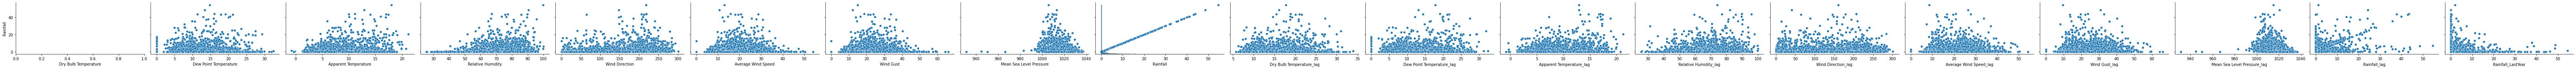

In [13]:
sns.pairplot(df, x_vars= ['Dry Bulb Temperature', 'Dew Point Temperature',
       'Apparent Temperature', 'Relative Humidity', 'Wind Direction',
       'Average Wind Speed', 'Wind Gust', 'Mean Sea Level Pressure',
       'Rainfall', 'Dry Bulb Temperature_lag', 'Dew Point Temperature_lag',
       'Apparent Temperature_lag', 'Relative Humidity_lag',
       'Wind Direction_lag', 'Average Wind Speed_lag', 'Wind Gust_lag',
       'Mean Sea Level Pressure_lag', 'Rainfall_lag', 'Rainfall_LastYear'],y_vars= ['Rainfall'], aspect =2)

<AxesSubplot:>

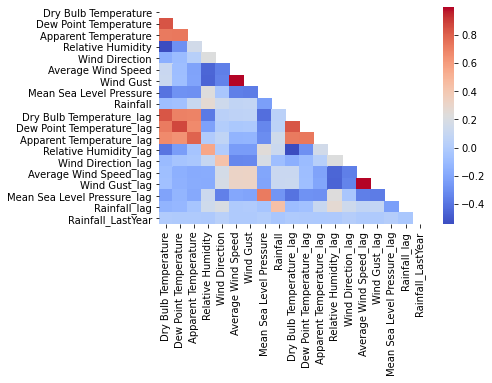

In [14]:
sns.heatmap(df.corr(), mask = np.triu(df.corr()),cmap= 'coolwarm')

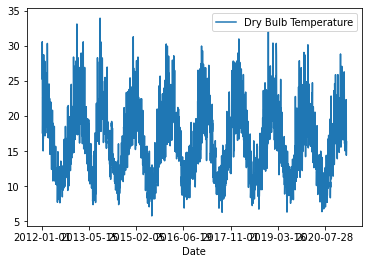

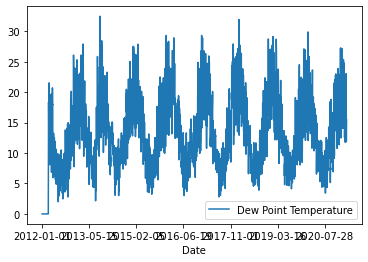

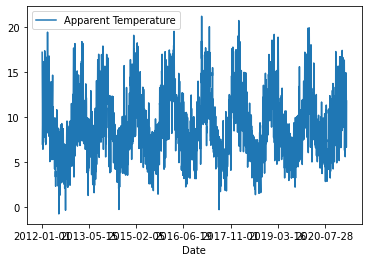

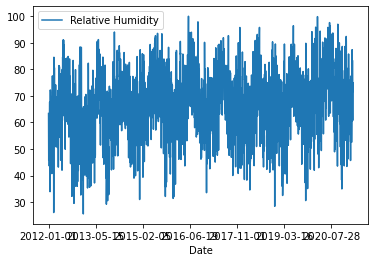

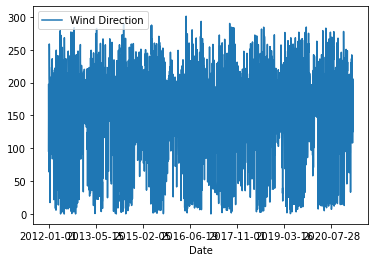

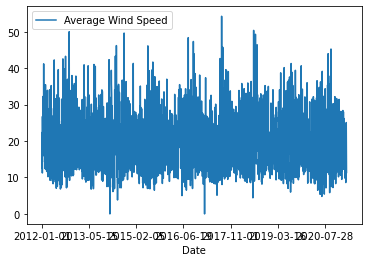

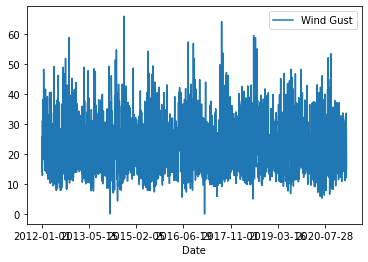

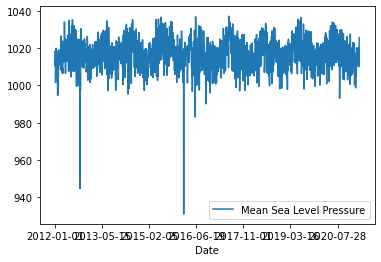

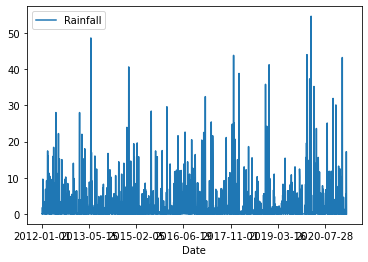

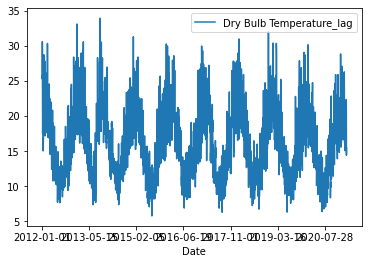

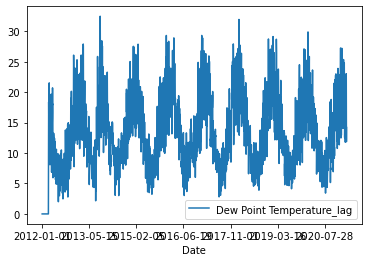

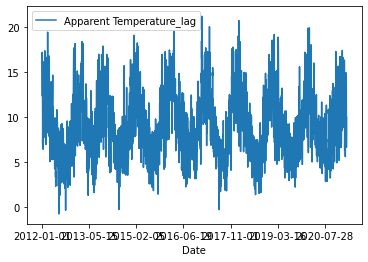

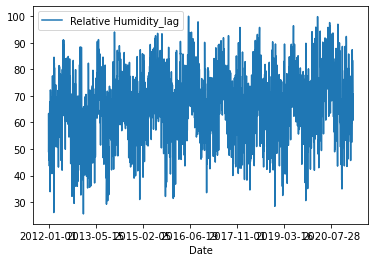

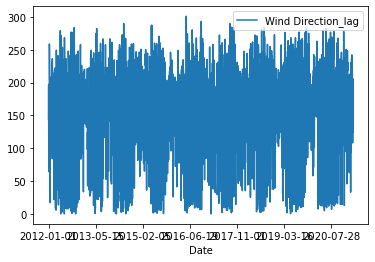

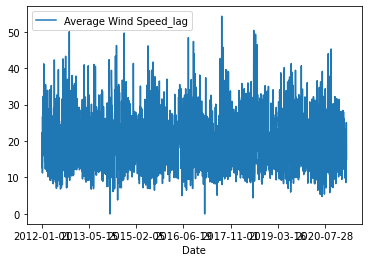

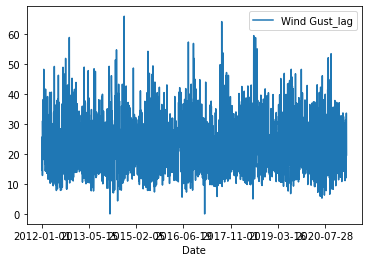

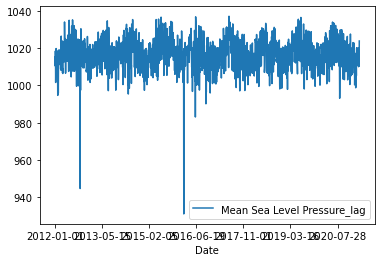

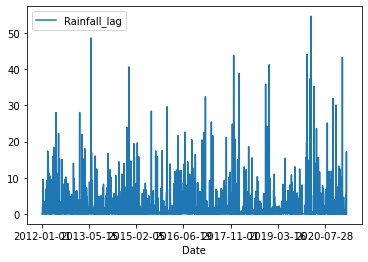

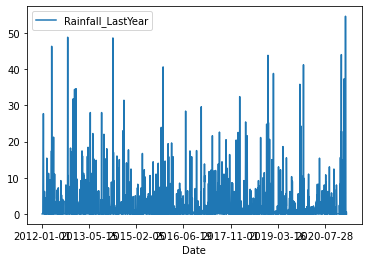

In [15]:
for column in df.columns[1:]:
    df.plot.line(x='Date', y= str(column))

In [16]:
#normalise 
for column in df.columns[1:]:
    df[column] = (df[column]-df[column].mean())/df[column].std()

In [17]:
df.describe()

,Dry Bulb Temperature,Dew Point Temperature,Apparent Temperature,Relative Humidity,Wind Direction,Average Wind Speed,Wind Gust,Mean Sea Level Pressure,Rainfall,Dry Bulb Temperature_lag,Dew Point Temperature_lag,Apparent Temperature_lag,Relative Humidity_lag,Wind Direction_lag,Average Wind Speed_lag,Wind Gust_lag,Mean Sea Level Pressure_lag,Rainfall_lag,Rainfall_LastYear
count,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03,3.232000e+03
mean,4.092226e-15,-5.736095e-16,-2.229480e-15,-2.476464e-15,-3.115976e-16,-1.522915e-15,2.797164e-15,7.048116e-14,1.309115e-15,3.713528e-15,-4.956328e-16,-2.500758e-15,-1.780548e-15,-2.149168e-16,-1.844956e-15,2.503996e-15,6.888796e-14,1.724418e-15,2.290075e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.153450e+00,-2.293498e+00,-2.716952e+00,-3.549491e+00,-2.159607e+00,-2.625111e+00,-2.560789e+00,-1.119361e+01,-4.287721e-01,-2.152832e+00,-2.291081e+00,-2.717204e+00,-3.547810e+00,-2.161372e+00,-2.626506e+00,-2.561885e+00,-1.119086e+01,-4.291579e-01,-4.288579e-01
25%,-8.054874e-01,-7.352179e-01,-7.467997e-01,-6.223466e-01,-6.589718e-01,-7.662828e-01,-7.595007e-01,-6.254722e-01,-4.287721e-01,-8.055712e-01,-7.355070e-01,-7.469646e-01,-6.217498e-01,-6.576631e-01,-7.661499e-01,-7.587105e-01,-6.263004e-01,-4.291579e-01,-4.288579e-01
50%,-1.092754e-01,-1.043617e-01,-1.128856e-01,3.193839e-02,2.901078e-01,-1.335140e-01,-1.443965e-01,1.006541e-02,-3.882838e-01,-1.098875e-01,-1.069398e-01,-1.130225e-01,3.212254e-02,2.902484e-01,-1.327445e-01,-1.437902e-01,1.105409e-02,-3.886746e-01,-3.901452e-01
75%,6.592230e-01,6.826004e-01,6.675125e-01,6.639801e-01,7.149562e-01,6.383477e-01,6.316784e-01,6.649327e-01,-2.388957e-02,6.591806e-01,6.828766e-01,6.674101e-01,6.630493e-01,7.151746e-01,6.383845e-01,6.318261e-01,6.647540e-01,-2.432504e-02,-4.173112e-02
max,3.773070e+00,3.324314e+00,3.324067e+00,2.884389e+00,2.019594e+00,4.711581e+00,4.951456e+00,2.577915e+00,1.062452e+01,3.770122e+00,3.322690e+00,3.324082e+00,2.884281e+00,2.019517e+00,4.713405e+00,4.953286e+00,2.578835e+00,1.062278e+01,1.013970e+01


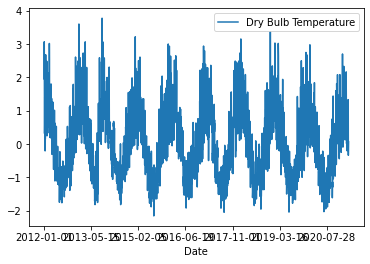

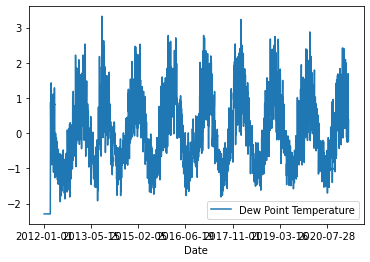

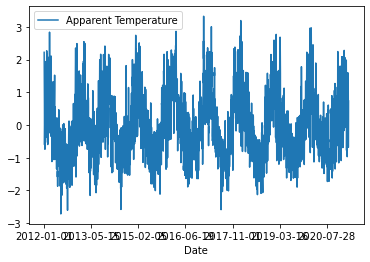

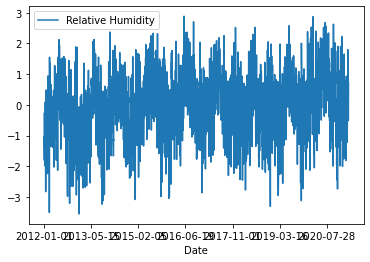

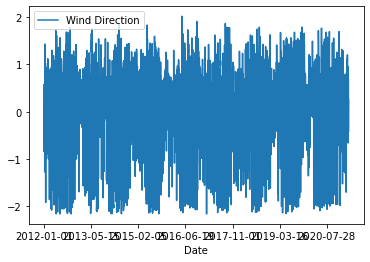

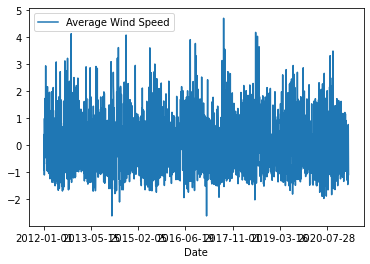

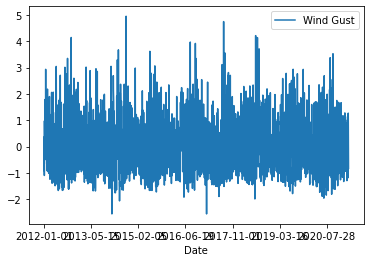

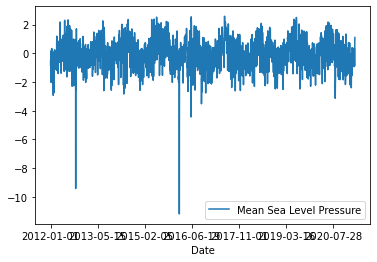

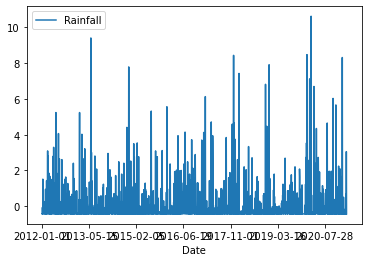

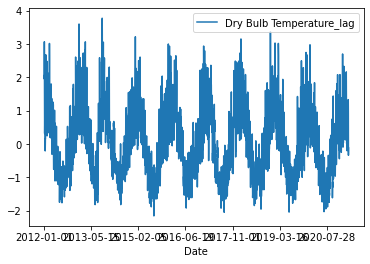

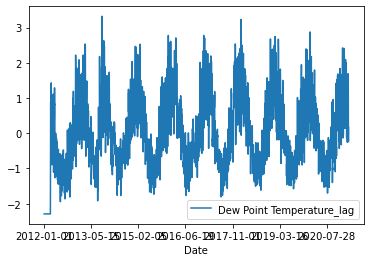

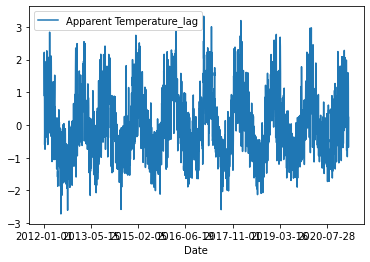

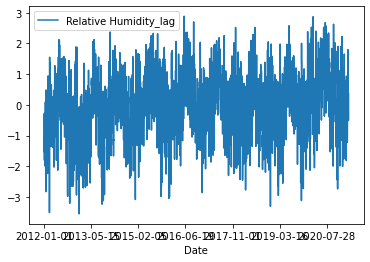

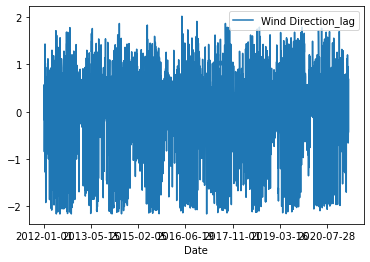

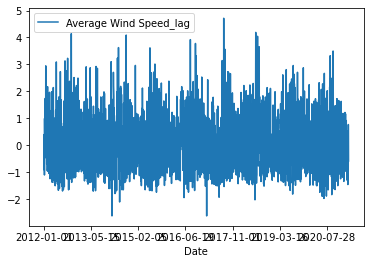

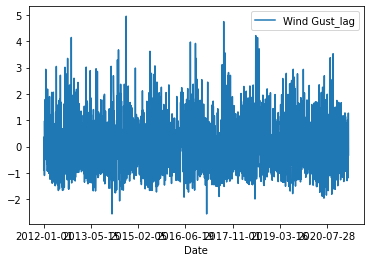

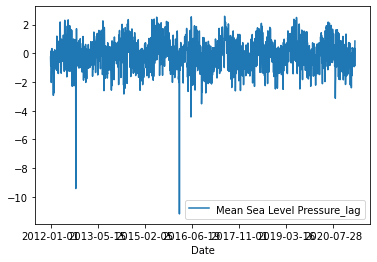

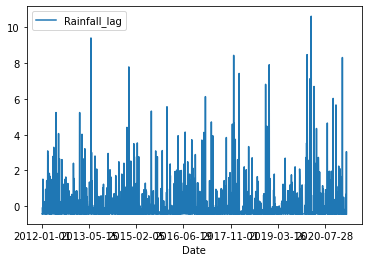

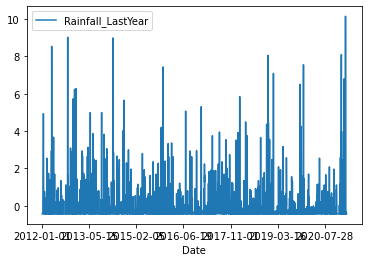

In [18]:
for column in df.columns[1:]:
    df.plot.line(x='Date', y= str(column))

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [21]:
#model
import sklearn.linear_model
from sklearn import metrics

def get_metrics(model_lst):
    '''
    Gets MSE and MAE 
    Input: List of models
    Output: Metrics'''
    lst = [metrics.mean_squared_error, metrics.mean_absolute_error]
    names =['MSE', 'MAE']
    out = [[] for i in range(len(model_lst))]
    for model in range(len(out)):
        for func in range(len(lst)):
            out[model] +=  [names[func], round(lst[func](test_y, model_lst[model]), 5)]
            
    return(out)

In [22]:
df['Date']= pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df_train, df_test = df.query('Year <= 2018'), df.query('Year > 2018')
df_train.columns

Index(['Date', 'Dry Bulb Temperature', 'Dew Point Temperature',
       'Apparent Temperature', 'Relative Humidity', 'Wind Direction',
       'Average Wind Speed', 'Wind Gust', 'Mean Sea Level Pressure',
       'Rainfall', 'Dry Bulb Temperature_lag', 'Dew Point Temperature_lag',
       'Apparent Temperature_lag', 'Relative Humidity_lag',
       'Wind Direction_lag', 'Average Wind Speed_lag', 'Wind Gust_lag',
       'Mean Sea Level Pressure_lag', 'Rainfall_lag', 'Rainfall_LastYear',
       'Month', 'Day', 'Year'],
      dtype='object')

In [23]:
train_date, train_x, train_y  = df_train['Date'], df_train[['Dry Bulb Temperature', 'Dew Point Temperature',
       'Apparent Temperature', 'Relative Humidity', 'Wind Direction',
       'Average Wind Speed', 'Wind Gust', 'Mean Sea Level Pressure', 'Month', 'Year', 'Day']], df_train['Rainfall']
test_date, test_x, test_y = df_test['Date'], df_test[['Dry Bulb Temperature', 'Dew Point Temperature',
       'Apparent Temperature', 'Relative Humidity', 'Wind Direction',
       'Average Wind Speed', 'Wind Gust', 'Mean Sea Level Pressure','Month', 'Year', 'Day']], df_test['Rainfall']

In [24]:
model =  sklearn.linear_model.Ridge(alpha=.5, random_state = 21)
model.fit(train_x, train_y)
get_metrics([model.predict(test_x)])

[['MSE', 0.97355, 'MAE', 0.5009]]

In [25]:
#Cross Validate
rng = np.random.RandomState(21)
alpha_arr = np.logspace(-1, 1, 40)
reg = sklearn.linear_model.RidgeCV(alphas = alpha_arr, cv = 8).fit(train_x, train_y)
reg.alpha_

0.1

In [26]:
model_2 =  sklearn.linear_model.Ridge(alpha= reg.alpha_, random_state = 21)
model_2.fit(train_x, train_y)
get_metrics([model_2.predict(test_x)])

[['MSE', 0.97344, 'MAE', 0.50111]]

In [27]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Rainfall in mm')

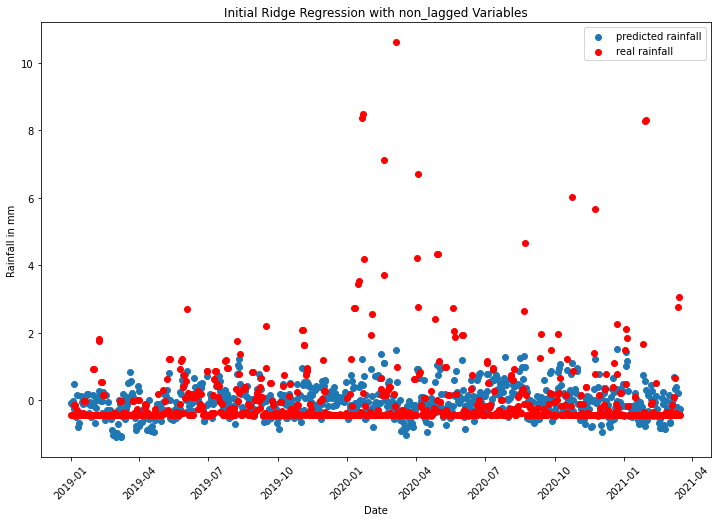

In [28]:
plt.figure(figsize= (12,8))
plt.scatter(x=test_date, y = model_2.predict(test_x), label = 'predicted rainfall')
plt.scatter(x=test_date, y = test_y, color ='red',label=  'real rainfall')
plt.xticks(rotation=45)
plt.legend()
plt.title('Initial Ridge Regression with non_lagged Variables')
plt.xlabel("Date")
plt.ylabel('Rainfall in mm')

In [29]:
#Fit lagged variables
train_date, train_x, train_y  = df_train['Date'], df_train[['Dry Bulb Temperature', 'Dew Point Temperature',
       'Apparent Temperature', 'Relative Humidity', 'Wind Direction',
       'Average Wind Speed', 'Wind Gust', 'Mean Sea Level Pressure',
       'Dry Bulb Temperature_lag', 'Dew Point Temperature_lag',
       'Apparent Temperature_lag', 'Relative Humidity_lag',
       'Wind Direction_lag', 'Average Wind Speed_lag', 'Wind Gust_lag',
       'Mean Sea Level Pressure_lag','Rainfall_lag', 'Month', 'Year', 'Day']], df_train['Rainfall']

test_date, test_x, test_y = df_test['Date'], df_test[['Dry Bulb Temperature', 'Dew Point Temperature',
       'Apparent Temperature', 'Relative Humidity', 'Wind Direction',
       'Average Wind Speed', 'Wind Gust', 'Mean Sea Level Pressure',
       'Dry Bulb Temperature_lag', 'Dew Point Temperature_lag',
       'Apparent Temperature_lag', 'Relative Humidity_lag',
       'Wind Direction_lag', 'Average Wind Speed_lag', 'Wind Gust_lag',
       'Mean Sea Level Pressure_lag', 'Rainfall_lag','Month', 'Year', 'Day']], df_test['Rainfall'] #large amount of accuracy from rainfall_lag

In [30]:
model =  sklearn.linear_model.Ridge(alpha=.5, random_state = 21)
model.fit(train_x, train_y)
get_metrics([model.predict(test_x)])

[['MSE', 0.81203, 'MAE', 0.46295]]

In [31]:
#Cross Validate
rng = np.random.RandomState(21)
alpha_arr = np.logspace(-1, 1, 40)
reg = sklearn.linear_model.RidgeCV(alphas = alpha_arr, cv = 8).fit(train_x, train_y)
reg.alpha_

0.3257020655659783

In [32]:
model_2 =  sklearn.linear_model.Ridge(alpha= reg.alpha_, random_state = 21)
model_2.fit(train_x, train_y)
get_metrics([model_2.predict(test_x)])

[['MSE', 0.81223, 'MAE', 0.46325]]

Text(0, 0.5, 'Rainfall in mm')

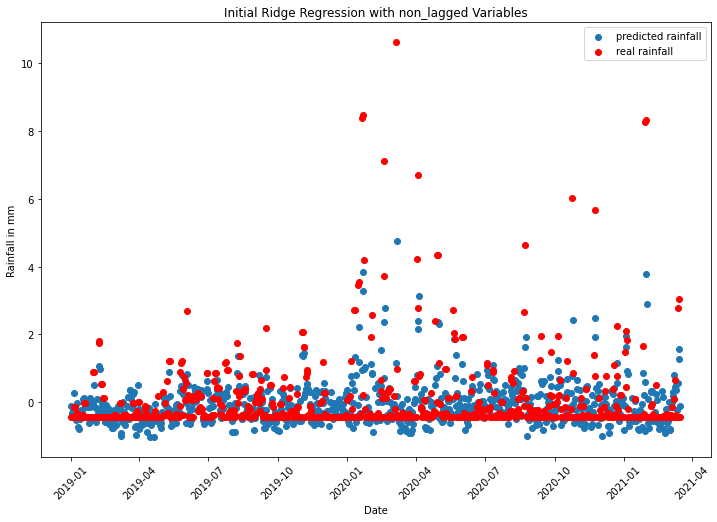

In [33]:
plt.figure(figsize= (12,8))
plt.scatter(x=test_date, y = model_2.predict(test_x), label = 'predicted rainfall')
plt.scatter(x=test_date, y = test_y, color ='red',label=  'real rainfall')
plt.xticks(rotation=45)
plt.legend()
plt.title('Initial Ridge Regression with non_lagged Variables')
plt.xlabel("Date")
plt.ylabel('Rainfall in mm')

In [34]:
# try relative humidity, dewpoint temp, apparent temp, dry bulb temp, lagged rainfall, rainfall last year 

In [35]:
#Fit more vars
train_date, train_x, train_y  = df_train['Date'], df_train[['Dry Bulb Temperature', 'Dew Point Temperature',
       'Apparent Temperature', 'Relative Humidity', 'Wind Direction',
       'Average Wind Speed', 'Wind Gust', 'Mean Sea Level Pressure',
       'Dry Bulb Temperature_lag', 'Dew Point Temperature_lag',
       'Apparent Temperature_lag', 'Relative Humidity_lag',
       'Wind Direction_lag', 'Average Wind Speed_lag', 'Wind Gust_lag',
       'Mean Sea Level Pressure_lag','Rainfall_lag', 'Rainfall_LastYear', 'Month', 'Year', 'Day']], df_train['Rainfall']

test_date, test_x, test_y = df_test['Date'], df_test[['Dry Bulb Temperature', 'Dew Point Temperature',
       'Apparent Temperature', 'Relative Humidity', 'Wind Direction',
       'Average Wind Speed', 'Wind Gust', 'Mean Sea Level Pressure',
       'Dry Bulb Temperature_lag', 'Dew Point Temperature_lag',
       'Apparent Temperature_lag', 'Relative Humidity_lag',
       'Wind Direction_lag', 'Average Wind Speed_lag', 'Wind Gust_lag',
       'Mean Sea Level Pressure_lag', 'Rainfall_lag', 'Rainfall_LastYear', 'Month', 'Year', 'Day']], df_test['Rainfall'] #large amount of accuracy from rainfall_lag

In [36]:
model_3 =  sklearn.linear_model.Ridge(alpha=.5, random_state = 21)
model_3.fit(train_x, train_y)
get_metrics([model_3.predict(test_x)])

[['MSE', 0.81185, 'MAE', 0.46287]]

In [37]:
#Cross Validate
alpha_arr = np.logspace(-1, 1, 40)
reg = sklearn.linear_model.RidgeCV(alphas = alpha_arr, cv = 8).fit(train_x, train_y)
reg.alpha_

0.3665241237079628

In [38]:
model_3 =  sklearn.linear_model.Ridge(alpha= reg.alpha_, random_state = 21)
model_3.fit(train_x, train_y)
get_metrics([model_3.predict(test_x)])

[['MSE', 0.812, 'MAE', 0.4631]]

In [39]:
#Other types of regressions
#Random Forest 
from sklearn.ensemble import RandomForestRegressor

In [40]:
RF = RandomForestRegressor(n_estimators=180, max_depth = 15, oob_score = True, random_state= 21)
RF.fit(train_x, train_y)

RandomForestRegressor(max_depth=15, n_estimators=180, oob_score=True,
                      random_state=21)

In [41]:
get_metrics([RF.predict(test_x)])

[['MSE', 0.66945, 'MAE', 0.40348]]

In [42]:
print(RF.oob_score_)

0.39381793054315206


In [43]:
from sklearn.ensemble import AdaBoostRegressor

In [44]:
boost_RF_5 =  AdaBoostRegressor(base_estimator = RF, n_estimators = 5, random_state = 12, loss = 'exponential')
boost_RF_5.fit(train_x, train_y)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=15,
                                                       n_estimators=180,
                                                       oob_score=True,
                                                       random_state=21),
                  loss='exponential', n_estimators=5, random_state=12)

In [45]:
get_metrics([boost_RF_5.predict(test_x)])

[['MSE', 0.66929, 'MAE', 0.42472]]